<a href="https://colab.research.google.com/github/FacuBelisario/Tesis-MSE/blob/master/SistemasDeControl/SistemaDeControlPID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

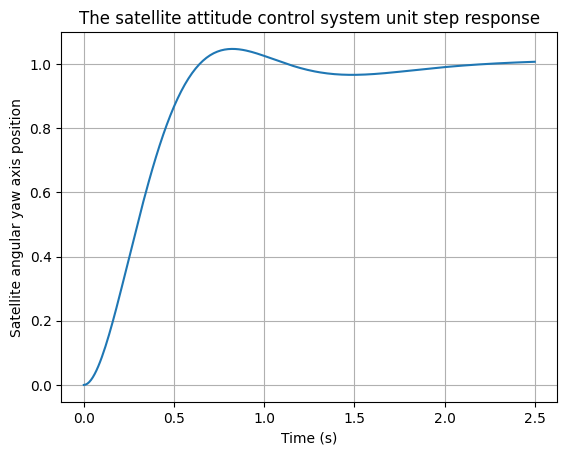

Solution found:
k = 21
a = 0.30000000000000004
Max overshoot = 1.047091345738962
Settling time = 1.8 sec


In [8]:
import numpy as np
import control as ctrl
import matplotlib.pyplot as plt

# Definir el tiempo de simulación
t = np.arange(0, 2.51, 0.01)  # De 0 a 2.5 s con paso de 0.01 s

solution = None  # Para almacenar la solución final

# Bucle exterior: variando k de 40 a 2
for k in range(40, 1, -1):
    # Bucle interior: variando a de 0.5 a 0.05
    for a in np.arange(0.5, 0.0, -0.05):
        # Definir el numerador y denominador de la función de transferencia
        num = [0, 0, k, 2 * k * a, k * a**2]
        den = [1, 6, 5 + k, 2 * k * a, k * a**2]

        # Crear el sistema de control
        sys = ctrl.TransferFunction(num, den)

        # Obtener la respuesta al escalón
        t_out, y = ctrl.step_response(sys, t)

        # Calcular el máximo de la respuesta
        m = np.max(y)

        # Encontrar el tiempo de establecimiento (cuando y está entre 0.98 y 1.02)
        s = len(y) - 1  # Último índice
        while s > 0 and 0.98 < y[s] < 1.02:
            s -= 1

        ts = (s - 1) * 0.01  # Tiempo de establecimiento

        # Verificar la condición para romper el bucle interno
        if 1.00 < m < 1.05 and ts < 2.0:
            solution = [k, a, m, ts]
            break  # Sale del bucle interno

    # Verificar la condición para romper el bucle externo
    if solution:
        break  # Sale del bucle externo

# Graficar la respuesta al escalón
plt.plot(t_out, y)
plt.grid()
plt.title('The satellite attitude control system unit step response')
plt.xlabel('Time (s)')
plt.ylabel('Satellite angular yaw axis position')
plt.show()

# Imprimir la solución encontrada
if solution:
    print("Solution found:")
    print(f"k = {solution[0]}")
    print(f"a = {solution[1]}")
    print(f"Max overshoot = {solution[2]}")
    print(f"Settling time = {solution[3]} sec")
else:
    print("No valid solution found.")
